In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os

# Import API key
from api_keys import g_key

gmaps.configure(api_key=g_key)

In [2]:
# Pull Crime Data file
file_to_load = "2010-2019_Crime.csv"

# Read Crime Data File
crime_df = pd.read_csv(file_to_load)
# crime_df

In [3]:
# Pull Community file
comm_file = "Chicago_Communities.csv"

# Read Chicago Community File 
comm_df = pd.read_csv(comm_file)
# comm_df

comm_list = comm_df.filter(['Community']).drop_duplicates()
comm_list

# Export DataFrame to CSV
comm_list.to_csv('CommList.csv')

In [4]:
# Create DataFrame to calculate annual crimes per year
crime_type_df = crime_df.filter(['Year',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# GroupBy Year
group_year = crime_type_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(group_year["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(group_year["Gun_Violence"].sum())
gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(group_year["Robbery"].sum())
# robbery_crimes
# Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(group_year["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(group_year["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(group_year["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(group_year["Sexual"].sum())
# sexual_crimes

In [5]:
# Merge Crime Calculations
merge_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
merge_table1

merge_table2 = pd.merge(merge_table1, robbery_crimes, on='Year')
merge_table2

merge_table3 = pd.merge(merge_table2, vandalism_crimes, on='Year')
merge_table3

merge_table4 = pd.merge(merge_table3, fraud_crimes, on='Year')
merge_table4

merge_table5 = pd.merge(merge_table4, drug_crimes, on='Year')
merge_table5

crime_type_totals = pd.merge(merge_table5, sexual_crimes, on='Year')
crime_type_totals = crime_type_totals.reset_index()
crime_type_totals

,Year,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,2010,87084,9771,14272,38137,12802,43387,4888
1,2011,81834,9684,13979,35068,12654,38599,4552
2,2012,79789,9828,13484,34007,12821,35487,4212
3,2013,72133,7966,11820,28936,12682,34129,3732
4,2014,65666,7613,9799,26298,10390,29128,3708
5,2015,65307,8357,9638,27658,8544,23940,3527
6,2016,70792,11524,11960,30119,9603,13311,2819
7,2017,69797,10594,11880,28124,10413,11673,3010
8,2018,68639,9601,9680,26928,12213,13439,3183
9,2019,66464,8563,8000,25650,11170,13875,3026


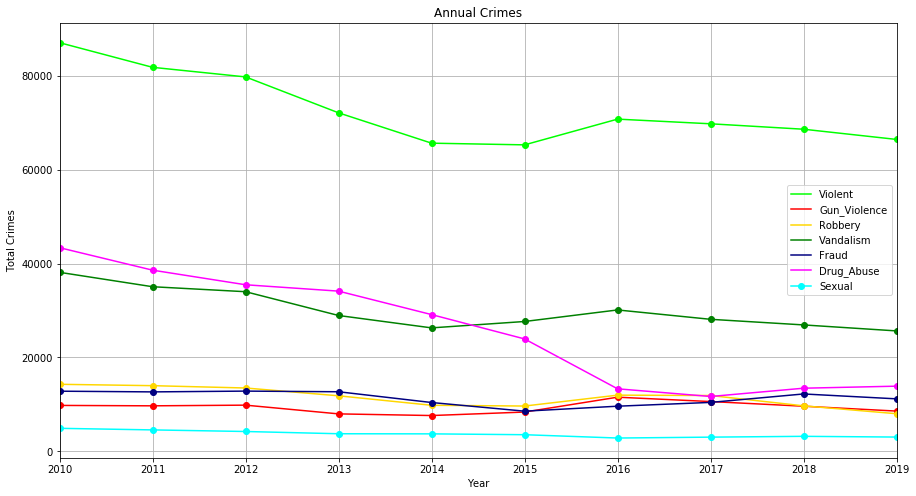

In [6]:
# Graph Crime Totals

ax = plt.gca()

crime_type_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
crime_type_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('grand_total_annual_crimes.png')

plt.show()

In [7]:
# Input to draw modified Line Graph
community = input("What part of Chicago do you want to look into? ")

What part of Chicago do you want to look into?  Near North Side


In [9]:
# Create a variable for city Areas and Neighborhoods
area = comm_df.loc[comm_df["Community"] == community]['City Area']
# type(area)
area = area.values
area = area[0]
# area type was originally a series so ".values" was used to pull an individual value from that series

neighborhoods = comm_df.loc[comm_df["Community"]== community]['Neighborhood']
neighborhoods = neighborhoods.values
# Print neighborhoods without brackets and separated by commas
neighborhoods = (', '.join(neighborhoods))

# Provide the city area and list of neighborhoods in the input community
print(f"{community} is in the {area} area, which includes the following neighborhoods: {neighborhoods}")

Near North Side is in the Central area, which includes the following neighborhoods: Cabrini-Green, The Gold Coast, Goose Island, Magnificent Mile, Old Town, River North, River West, Streeterville


In [10]:
# Create DataFrame to calculate annual crimes for input Community 
comm_crime_df = crime_df.filter(['Year',
                                 'Community',
                                 'Violent',
                                 'Gun_Violence',
                                 'Robbery',
                                 'Vandalism',
                                 'Fraud',
                                 'Drug_Abuse',
                                 'Sexual'])

# Use ".loc" to create a DataFrame for input community
input_df = comm_crime_df.loc[comm_crime_df["Community"]== community]
input_df

# GroupBy Year
year_group = input_df.groupby(['Year'])

# Calculate Violent Crimes
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
# violent_crimes
# # Calculate Gun Violence Crimes
gun_crimes = pd.DataFrame(year_group["Gun_Violence"].sum())
# gun_crimes
# Calculate Robbery Crimes
robbery_crimes = pd.DataFrame(year_group["Robbery"].sum())
# robbery_crimes
# # Calculate Vandalism Crimes
vandalism_crimes = pd.DataFrame(year_group["Vandalism"].sum())
# vandalism_crimes
# # Calculate Fraudulent Crimes
fraud_crimes = pd.DataFrame(year_group["Fraud"].sum())
# fraud_crimes
# Calculate Durg Relate Crimes
drug_crimes = pd.DataFrame(year_group["Drug_Abuse"].sum())
# drug_crimes
# Calculate Sexual Crimes
sexual_crimes = pd.DataFrame(year_group["Sexual"].sum())
# sexual_crimes

In [11]:
# Merge Crime Calculation DataFrames
m_table1 = pd.merge(violent_crimes, gun_crimes, on='Year')
m_table1

m_table2 = pd.merge(m_table1, robbery_crimes, on='Year')
m_table2

m_table3 = pd.merge(m_table2, vandalism_crimes, on='Year')
m_table3

m_table4 = pd.merge(m_table3, fraud_crimes, on='Year')
m_table4

m_table5 = pd.merge(m_table4, drug_crimes, on='Year')
m_table5

# Final Community DataFrame
comm_crime_totals = pd.merge(m_table5, sexual_crimes, on='Year')
comm_crime_totals = comm_crime_totals.reset_index()
comm_crime_totals

,Year,Violent,Gun_Violence,Robbery,Vandalism,Fraud,Drug_Abuse,Sexual
0,2010,1898,85,347,696,902,575,209
1,2011,1735,58,350,610,1262,430,169
2,2012,1693,72,267,677,1159,307,127
3,2013,1473,60,197,436,1069,238,114
4,2014,1472,60,176,477,867,218,117
5,2015,1365,72,204,493,830,258,104
6,2016,1708,116,294,642,964,122,53
7,2017,2016,132,414,617,1239,139,59
8,2018,2169,118,383,593,1615,132,61
9,2019,2252,140,417,586,1335,149,55


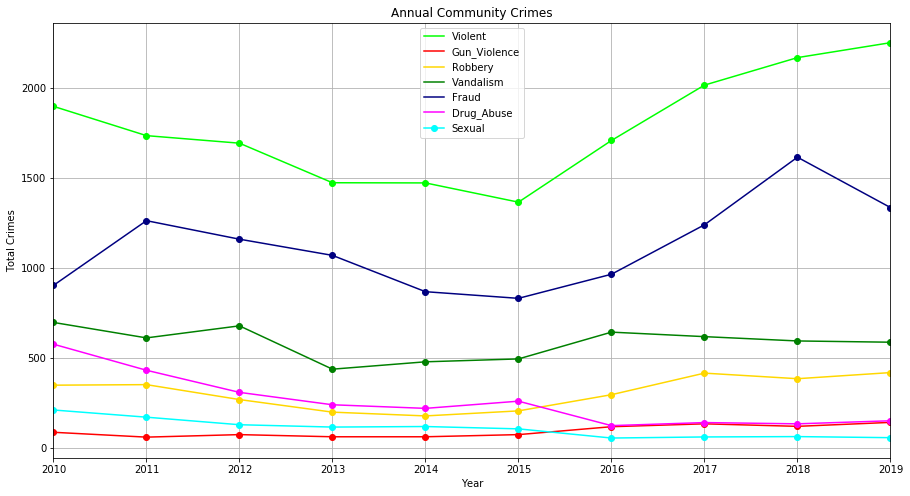

In [12]:
# Graph Crime Totals

ax = plt.gca()

comm_crime_totals.plot(kind='line',x='Year',y='Violent',marker ='o',color='lime',figsize=(15,8),ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Gun_Violence', marker ='o',color='red', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Robbery',marker ='o', color = 'gold', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Vandalism',marker ='o', color = 'green', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Fraud',marker ='o', color = 'navy', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Drug_Abuse',marker ='o', color = 'magenta', ax=ax)
comm_crime_totals.plot(kind='line',x='Year',y='Sexual',marker ='o', color = 'aqua', ax=ax)

# Add title, labels legend & grid lines
plt.title("Annual Community Crimes")
plt.xlabel("Year")
plt.ylabel("Total Crimes")

plt.grid(True)

# Save the Figure
plt.savefig('grand_total_annual_crimes.png')

plt.show()

In [13]:
# Annual Gun Violence: 
# Top 9 communities with over 3,400 Gun Violence Crimes between 2010-2019

# Filter by Top 9 Communities
gun_violence_df = crime_df[(crime_df.Community == 'Austin')|
                        (crime_df.Community == 'North Lawndale')|
                        (crime_df.Community == 'South Shore')|
                        (crime_df.Community == 'West Englewood')|
                        (crime_df.Community == 'Roseland')|
                        (crime_df.Community == 'Auburn Gresham')|
                        (crime_df.Community == 'Greater Grand Crossing')|
                        (crime_df.Community == 'Englewood')|
                        (crime_df.Community == 'Humboldt Park')]
# gun_violence_df

# Filter Relevant Columns
gun_violence_df = gun_violence_df.filter(["Year", "Community", "Gun_Violence"])
# gun_violence_df

# Group by Year and Community
comm_year_group = gun_violence_df.groupby(["Year","Community"])

# Calculate Gun Violence per Year by Community
gun_violence_df = pd.DataFrame(comm_year_group["Gun_Violence"].sum())
# gun_violence_df

# Pivot Table to reformat the DataFrame
gun_violence_df = gun_violence_df.pivot_table(index= 'Year', columns = 'Community', values = 'Gun_Violence')
gun_violence_df= gun_violence_df.reset_index()
# gun_violence_df

# Rename Columns with spaces
gun_violence_df.rename(columns={'North Lawndale': 'North_Lawndale',
                                'South Shore': 'South_Shore',
                                'West Englewood': 'West_Englewood',
                                'Auburn Gresham': 'Auburn_Gresham',
                                'Greater Grand Crossing': 'Greater_Grand_Crossing',
                                'Humboldt Park': 'Humboldt_Park'}, inplace =True)
gun_violence_df


Community,Year,Auburn_Gresham,Austin,Englewood,Greater_Grand_Crossing,Humboldt_Park,North_Lawndale,Roseland,South_Shore,West_Englewood
0,2010,358,830,442,358,401,322,472,380,432
1,2011,356,828,434,407,328,406,392,473,468
2,2012,364,823,371,429,343,402,414,487,406
3,2013,338,599,311,320,289,287,364,326,368
4,2014,297,684,314,289,300,289,331,331,321
5,2015,323,738,303,288,302,351,317,289,310
6,2016,457,1042,389,386,443,533,426,421,465
7,2017,413,967,321,402,445,463,336,402,389
8,2018,454,812,297,310,352,396,400,331,335
9,2019,380,722,306,320,262,387,310,362,293


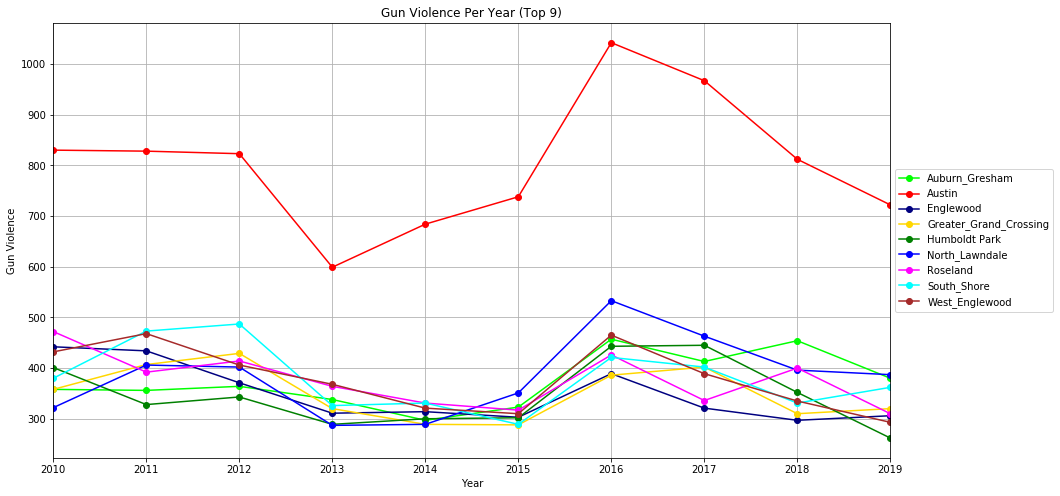

In [14]:
# Build Gun Violence Line Graph

# gca stands for 'get current axis'
ax = plt.gca()

gun_violence_df.plot(kind='line',x='Year',y='Auburn_Gresham',marker ='o',color='lime',figsize=(15,8),ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Austin', marker ='o',color='red', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Englewood',marker ='o', color = 'navy', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Greater_Grand_Crossing',marker ='o', color = 'gold', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Humboldt_Park',marker ='o', color = 'green', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='North_Lawndale',marker ='o', color = 'blue', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='Roseland',marker ='o', color = 'magenta', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='South_Shore',marker ='o', color = 'aqua', ax=ax)
gun_violence_df.plot(kind='line',x='Year',y='West_Englewood',marker ='o', color = 'brown', ax=ax)

# Add title, labels legend & grid lines
plt.title("Gun Violence Per Year (Top 9)")
plt.xlabel("Year")
plt.ylabel("Gun Violence")

# Legend Names & Relocate outside of graph
plt.legend(["Auburn_Gresham",
            "Austin", 
            "Englewood", 
            "Greater_Grand_Crossing", 
            "Humboldt Park",
            "North_Lawndale",
            "Roseland",
            "South_Shore",
            "West_Englewood"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(True)

# Save the Figure
plt.savefig('annual_gun_violence.png')
# plt.grid(axis='y')
plt.show()

In [15]:
# Violent Crimes vs # of Arrests

# Build DataFrame
arrest_df = crime_df.filter(['Year','Violent','Arrests'])
arrest_df

# Exclude rows that are >0 under Violent column
arrest_df = arrest_df.query('Violent > 0')
arrest_df

# GroupBy Year
year_group = arrest_df.groupby(["Year"])

# Calculate Violent Crimes per Year
violent_crimes = pd.DataFrame(year_group["Violent"].sum())
violent_crimes

#Calculate # of Arrests per year
arrests = pd.DataFrame(year_group["Arrests"].sum())
arrests

# Calculate No Arrests
arrest_df['No_Arrests'] = arrest_df['Violent'] - arrest_df['Arrests']
arrest_df

# Merge Violent_Crimes and Arrests DataFrames
v_crime_arrests = pd.merge(violent_crimes, arrests, on = 'Year')
v_crime_arrests

v_crime_arrests['No_Arrests'] = v_crime_arrests['Violent'] - v_crime_arrests['Arrests']
v_crime_arrests = v_crime_arrests.reset_index()
v_crime_arrests = v_crime_arrests.filter(["Year", "Arrests", "No_Arrests"])
# v_crime_arrests

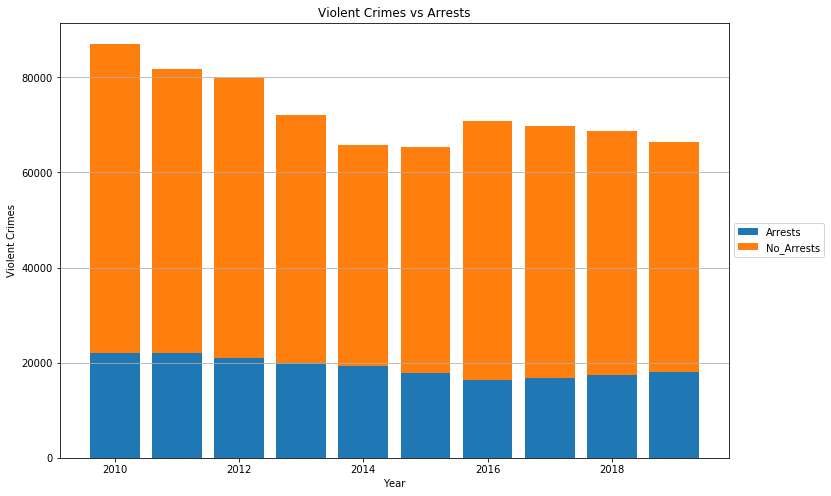

In [17]:
# Stack Bar Chart Violent Crimes vs Arrests
cumval=0
fig = plt.figure(figsize=(12,8))
for col in v_crime_arrests.columns[~v_crime_arrests.columns.isin(['Year'])]:
    plt.bar(v_crime_arrests.Year, v_crime_arrests[col], bottom=cumval, label=col)
    cumval = cumval+v_crime_arrests[col]

# Add title, labels legend & grid lines
plt.title("Violent Crimes vs Arrests")
plt.xlabel("Year")
plt.ylabel("Violent Crimes")

# Legend Names & Relocate outside of graph
plt.legend(["Arrests",
            "No_Arrests"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.grid(axis='y')

# Save the Figure
plt.savefig('v_crime_arrests.png')

plt.show()